# Building a MLP

# Building the Model 

## Imports 

In [39]:
import numpy as np
import tensorflow as tf
import pandas
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import json
 

## Data Reading and Preprocessing 


In [34]:
data = pandas.read_csv('dataset/adult.csv')
data = data.dropna()
print("Data after dropping null atrributes", data)
data = data.drop_duplicates()
print("Data after dropping duplicates", data)
data = data.drop("fnlwgt", axis = 1) # Drop the fnlwgt column (axis = 1)

X = pandas.get_dummies(data.drop('income', axis=1))
y = data['income']
le = LabelEncoder()
y = le.fit_transform(y)


print("X after preprocessing", X)
print("Y after preprocessing", y)

print("Shape of X", X.shape)
print("Shape of y", y.shape)

print("Target variable distribution", np.unique(y, return_counts=True))


Data after dropping null atrributes        age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      

## Reading JSON and Setting the Model Parameters and Plotting metrics

JSON Data {'layers': [{'type': 'input', 'neurons': 4}, {'type': 'hidden', 'neurons': 4, 'activation': 'sigmoid'}, {'type': 'output', 'neurons': 1, 'activation': 'sigmoid'}], 'learning_rate': 0.1, 'epochs': 2, 'batch_size': 32}
Epoch 1/2
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7379 - loss: 0.5404 - val_accuracy: 0.7537 - val_loss: 0.4846
Epoch 2/2
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7650 - loss: 0.4722 - val_accuracy: 0.7537 - val_loss: 0.4937


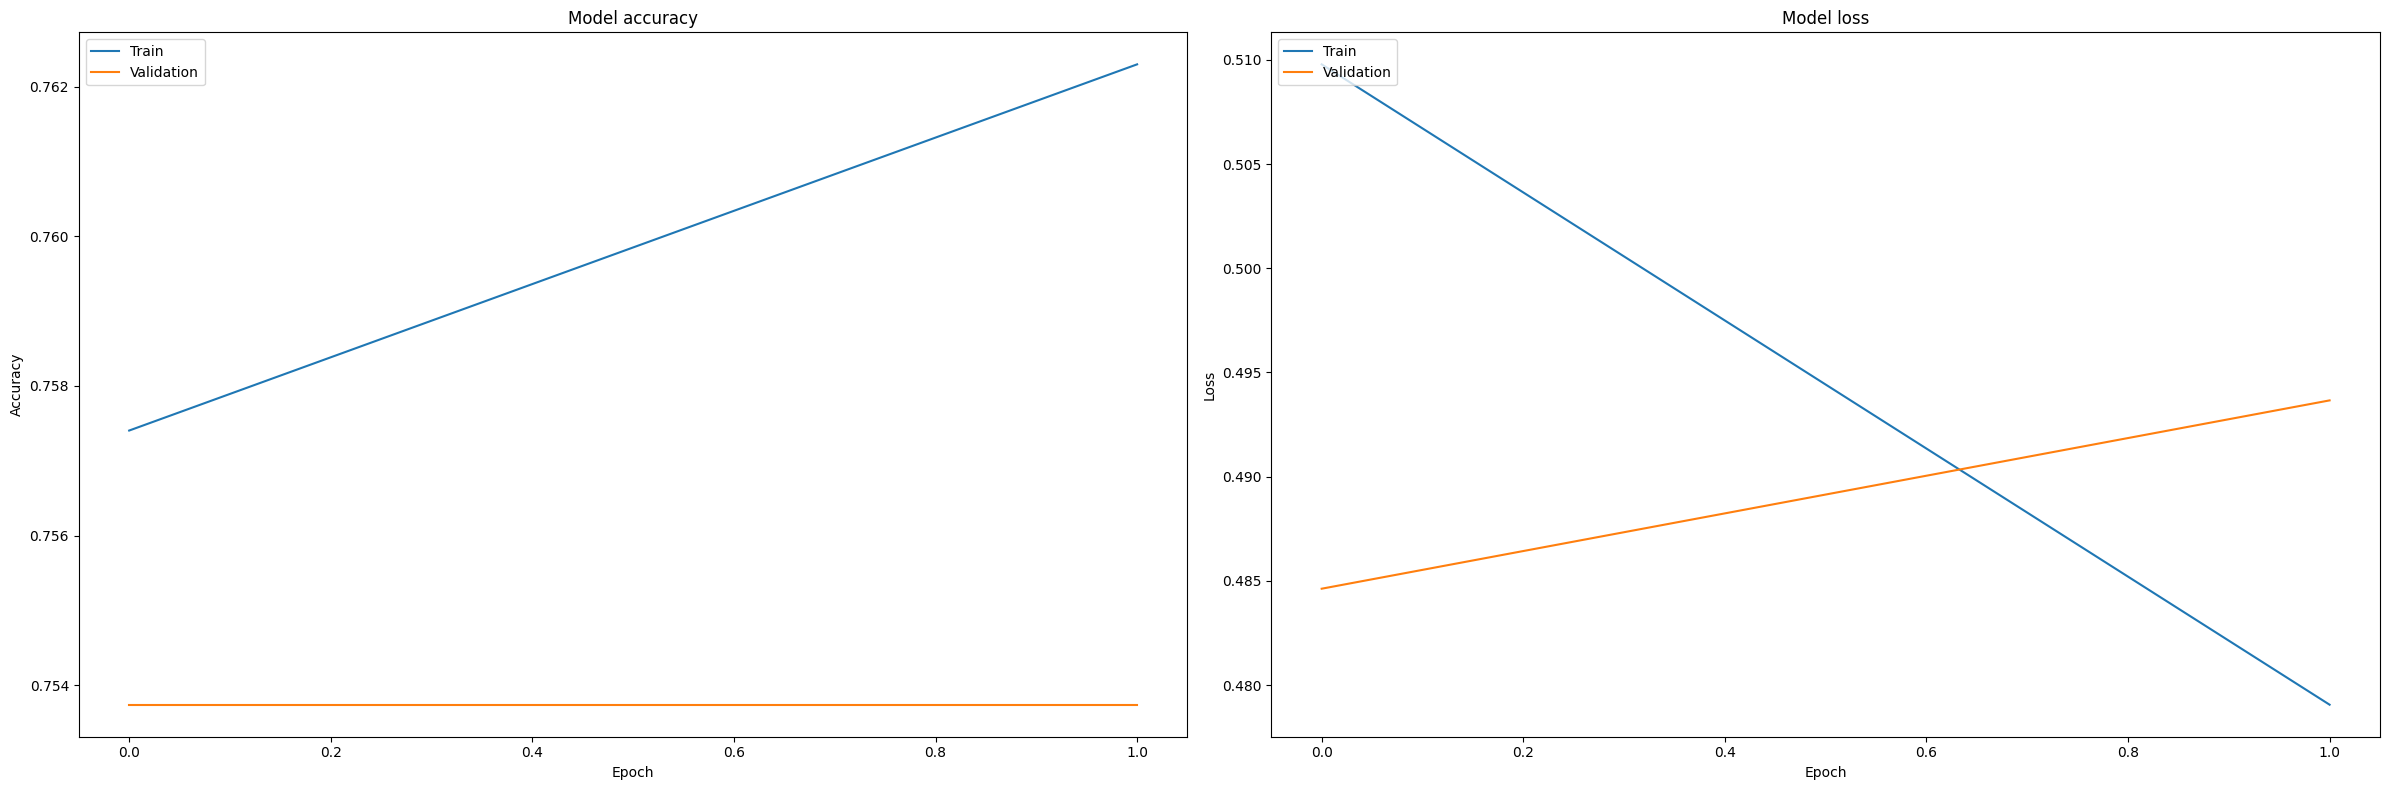

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 4)              │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313 (5.13 KB)

 Trainable params: 437 (1.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 876 (3.43 KB)

In [45]:
with open('MLP.json') as f:
    data = json.load(f)

print("JSON Data", data)
layers_list = []

for layer in data['layers']:
    if layer['type'] == 'input':
        layers_list.append(Input((X.shape[1],)))
    else:
        layers_list.append(Dense(layer['neurons'], activation = layer['activation']))



model = Sequential(layers_list)

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
    
    )

X_tensor = tf.convert_to_tensor(X.values, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)

history = model.fit(X_tensor, y_tensor, epochs = data['epochs'],  batch_size= data['batch_size'], validation_split=0.2)

# Plot training & validation accuracy values
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

model.summary()

# Activation Functions and Their Derivatives



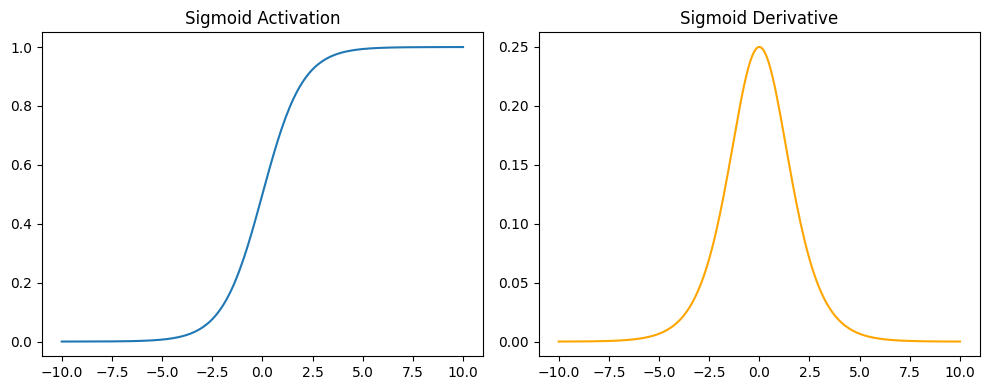

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values for plotting
x_values = np.linspace(-10, 10, 200)

# Step Function and Derivative
def step_function(x):
    return np.where(x >= 0, 1, 0)

def step_derivative(x):
    return np.zeros_like(x)

# Linear Function and Derivative
def linear_function(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

# Sigmoid Function and Derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# Tanh Function and Derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# ReLU Function and Derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Leaky ReLU Function and Derivative
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# ELU Function and Derivative
def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x >= 0, 1, alpha * np.exp(x))



# Function to plot an activation function and its derivative
y_values = step_function(x_values)      # Compute activation function values
y_derivatives = step_derivative(x_values)  # Compute derivative values

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Create a 1x2 grid for plots

# Plot the activation function
axes[0].plot(x_values, y_values)
axes[0].set_title('Step Activation')

# Plot the derivative
axes[1].plot(x_values, y_derivatives, color='orange')
axes[1].set_title(" Step Derivative")

plt.tight_layout()
plt.show()


# Example: Plot the Sigmoid Function and its Derivative
plot_activation_and_derivative(sigmoid, sigmoid_derivative, 'Sigmoid')

# You can change the activation function and its derivative in the line below to study each one
# Example: plot_activation_and_derivative(relu, relu_derivative, 'ReLU')
